# Analysis

In [120]:
# importing libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

In [121]:
matplotlib.style.use('seaborn-darkgrid')

In [122]:
df = pd.read_csv('twitter_archive_cleaned_and_shiny.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 16 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null object
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
dog_stage             322 non-null object
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
favorites             1970 non-null int64
retweets              1970 non-null int64
name                  1970 non-null object
dtypes: bool(1), float64(1), int64(6), object(8)
memory usage: 232.9+ KB


In [123]:
# hmm apparently when you save a datframe into a csv file and read that csv fuile in another jupyter file the datatypes are lost.
# to fix that
df['dog_stage'] = df['dog_stage'].astype('category')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['tweet_id'] = df['tweet_id'].astype('str')
df['name'] = df['name'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 16 columns):
tweet_id              1970 non-null object
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
dog_stage             322 non-null category
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
favorites             1970 non-null int64
retweets              1970 non-null int64
name                  1970 non-null object
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 219.6+ KB


In [124]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorites,retweets,name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,39193,8740,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,33573,6412,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,25308,4257,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,42561,8834,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,40749,9617,Franklin


In [125]:
# get the counts of tweet grouped by year and month
count_by_month = df['timestamp'].groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()

df_tweets = pd.DataFrame(count_by_month)
#df_tweets.index = [df_tweets['timestamp'].datetime(year=int(y), month=int(m), day=28) for y, m in df_tweets.index]
#df_tweets.index.names = ['date']
#df_tweets = df.reset_index()
#df_tweets = df_tweets.rename(columns = {'datetime':'count'})

# create a simple plot 
#fig, ax = plt.subplots()
#plt.plot(df_tweets['date'], df_tweets['count'])
#plt.xticks(rotation=35)
#plt.ylabel('counts')
#plt.xlabel('date')
#plt.title('The trend of tweets in WeRateDogs')
df_tweets.head()

timestamp
timestamp timestamp           
2015      11               295
          12               360
2016      1                166
          2                108
          3                118

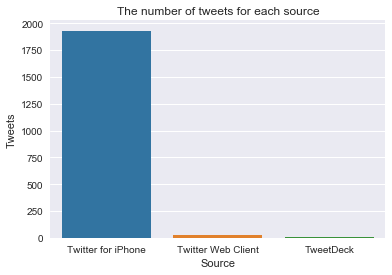

In [126]:
source_plot = sns.countplot(df['source'])
source_plot.set_title('The number of tweets for each source')
source_plot.axes.xaxis.label.set_text('Source')
source_plot.axes.yaxis.label.set_text('Tweets')

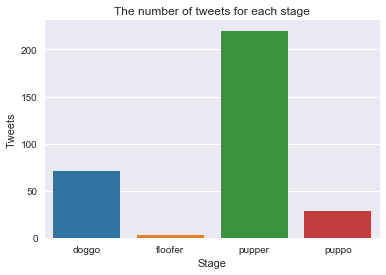

In [127]:
stages_plot = sns.countplot(df['dog_stage'])
stages_plot.set_title('The number of tweets for each stage')
stages_plot.axes.xaxis.label.set_text('Stage')
stages_plot.axes.yaxis.label.set_text('Tweets')

Text(0,0.5,'Rating out of 10')

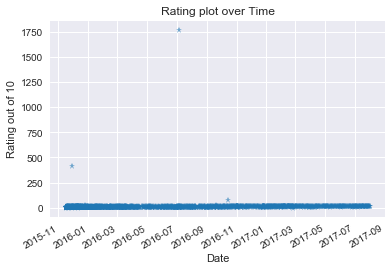

In [128]:
df = df.set_index('timestamp')
df.plot(y ='rating_numerator', style = '*', alpha = .6, legend = False)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating out of 10')

Text(0,0.5,'Rating out of 10')

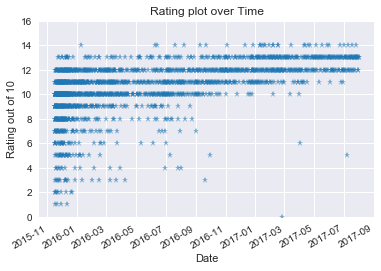

In [132]:

df.plot(y ='rating_numerator', ylim=[0,16], style = '*', alpha = .6, legend = False)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating out of 10')

Text(0,0.5,'Count')

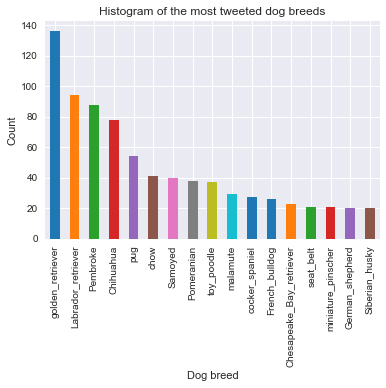

In [143]:
df_by_breed = df.groupby('p1').filter(lambda breed: len(breed) >= 20)

df_by_breed['p1'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the most tweeted dog breeds')
plt.xlabel('Dog breed')
plt.ylabel('Count')

Text(0,0.5,'Count')

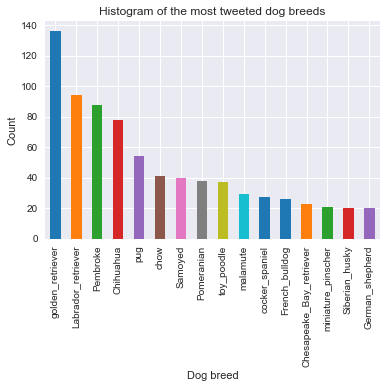

In [141]:
df_is_dog = df[df['p1_dog'] == True]
df_by_breed = df_is_dog.groupby('p1').filter(lambda breed: len(breed) >= 20)

df_by_breed['p1'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the most tweeted dog breeds')
plt.xlabel('Dog breed')
plt.ylabel('Count')